### This notebook reproduces the panels of Figure 3 in https://www.biorxiv.org/content/10.1101/2021.05.11.443578v1

In [ ]:
import sys
sys.path.append('/home/zinovyev/anaconda3/lib/python3.7/site-packages')
sys.path.append('/mnt/c/MyPrograms/__github/monomolecular_reduction/')
print(sys.path)

In [2]:
import networkx as nx
import lnetreduce
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_graph(G,show_edge_labels=False,curved_edges=True):
    edge_labels = {}
    for c,d,w in G.edges(data=True):
        edge_labels[(c,d)] = w['weight']
    pos = nx.layout.kamada_kawai_layout(G)
    plt.figure(3,figsize=(8,8)) 
    if curved_edges:
        nx.draw(G,pos,node_size=3000,font_size=20,with_labels=True,node_color='lightgray',edge_color='black',arrowsize=40,connectionstyle='arc3,rad=0.1')
    else:
        nx.draw(G,pos,node_size=3000,font_size=20,with_labels=True,node_color='lightgray',edge_color='black',arrowsize=40)
    if show_edge_labels:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=24)
    plt.show()
    


In [19]:
t_filename = "models/MYCN.sif"

filename = t_filename
node_names = []
edges = []
with open(filename,'r') as f:
    l = f.readline()[:-1]
    while l:
        prts = l.split('\t')
        sr = prts[0]
        tg = prts[2]
        if not (sr in node_names):
            node_names.append(sr)
        if not (tg in node_names):
            node_names.append(tg)
        edges.append((sr,tg))
        l = f.readline()[:-1]
print(edges)

with open(filename[:-4]+'.csv','w') as f:
    f.write('source;target;weight\n')
    for i,e in enumerate(edges):
        f.write(str(e[0])+';'+str(e[1])+';'+str(i)+'\n')

filename = filename[:-4]+'.csv'
reduced_filename = "%s_reduced" % filename
timescale = 5


[('E2F3', 'E2F1'), ('E2F3', 'MYCN'), ('E2F2', 'E2F1'), ('E2F2', 'MYCN'), ('MYCN', 'TP53'), ('TP53', 'E2F1'), ('TP53', 'E2F3'), ('E2F1', 'E2F3'), ('E2F1', 'TP53'), ('E2F1', 'MYCN')]


/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


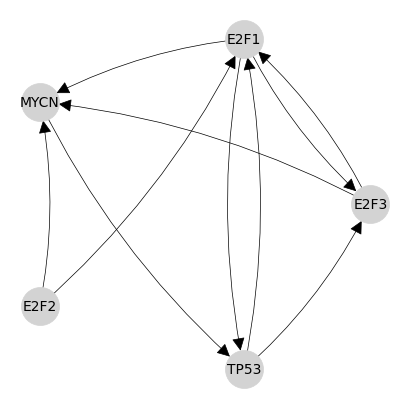

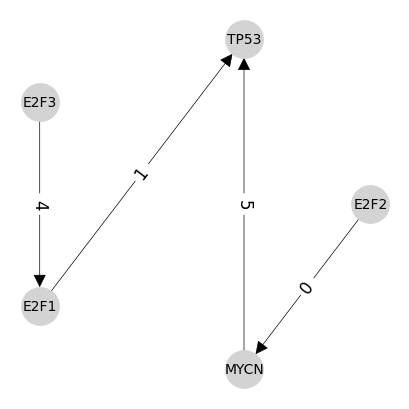

In [20]:
G = lnetreduce.load_graph(filename)

plt.rcParams['figure.dpi']= 50

plot_graph(G)

while True:
    lnetreduce.reduction.permute_timescales(G)
    try:
        uG = lnetreduce.reduce_graph(G)
    except:
        print("No reduction for these labels")
        continue
    
    plot_graph(uG,show_edge_labels=True,curved_edges=False)
    
    break

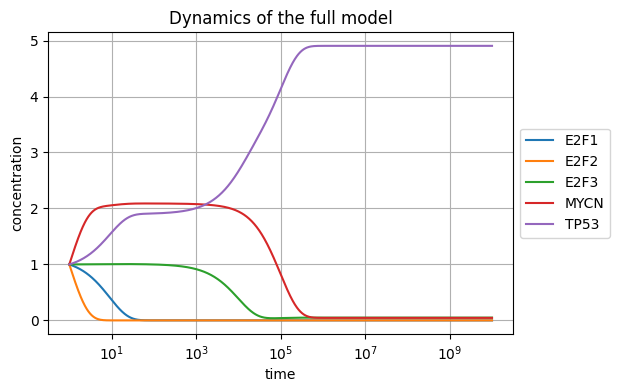

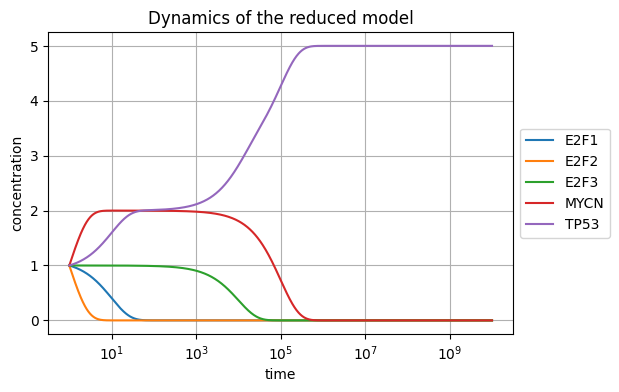

In [21]:
timescale = 10
method='odeint'

plt.rcParams['figure.dpi']= 100

lnetreduce.simulate_and_plot(G,  timescale, title='Dynamics of the full model',method=method)
plt.show()
lnetreduce.simulate_and_plot(uG, timescale, title='Dynamics of the reduced model',method=method)

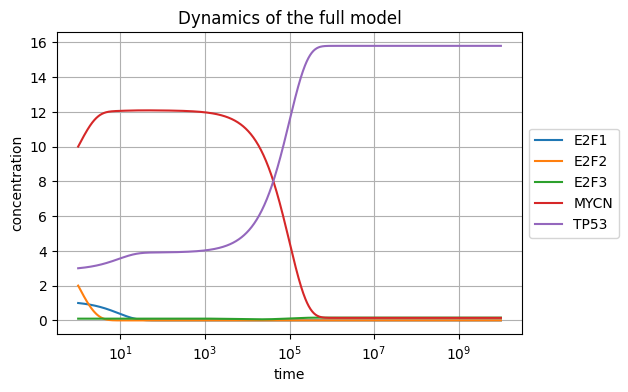

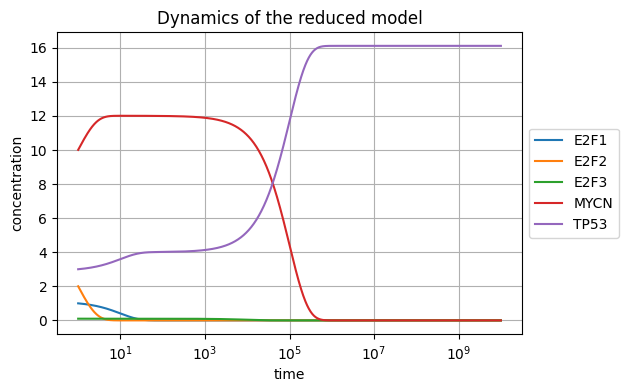

In [22]:
# Same but with different initial condition

timescale = 10
method='odeint'

plt.rcParams['figure.dpi']= 100

x0 = np.array([1,2,0.1,10,3])

lnetreduce.simulate_and_plot(G,  timescale, title='Dynamics of the full model', method=method, initial_state=x0)
plt.show()
lnetreduce.simulate_and_plot(uG, timescale, title='Dynamics of the reduced model', method=method, initial_state=x0)

In [68]:
# generate many permuted graphs
graphs = []
number_of_permutations = 10000
for i in range(number_of_permutations):
    G1 = G.copy()
    lnetreduce.reduction.permute_timescales(G1)
    graphs.append(G1)

In [69]:
# generate a list of unique up to isomorphism graphs

def nm(n1,n2):
    if n1['id']==n2['id']:
        return True
    else:
        return False
    

unique_reduced = []
counts = []
for gr in graphs:
    try:
        ugr = lnetreduce.reduce_graph(gr)
    except:
        #print("Error during reduction")
        continue
    node_ids = {}
    for n in ugr.nodes:
        node_ids[n] = n
    nx.set_node_attributes(ugr,node_ids,'id')    
    found = False
    for i,red_gr in enumerate(unique_reduced):
        node_ids = {}
        for n in red_gr.nodes:
            node_ids[n] = n
        nx.set_node_attributes(red_gr,node_ids,'id')
        if nx.is_isomorphic(ugr,red_gr,node_match=nm):
        #if nx.is_isomorphic(ugr,red_gr):
            found = True
            counts[i] = counts[i]+1
    if not found:
        unique_reduced.append(ugr)
        counts.append(1)
print(len(unique_reduced))
print(counts)
total_counts = 0
for c in counts:
    total_counts+=c

50
[178, 274, 210, 279, 322, 275, 266, 199, 336, 233, 19, 260, 78, 193, 218, 260, 192, 270, 198, 293, 246, 198, 175, 274, 182, 202, 216, 192, 167, 284, 332, 205, 227, 18, 256, 159, 234, 194, 13, 317, 190, 335, 27, 15, 52, 2, 2, 18, 11, 4]


Number of unique graphs =  50


/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

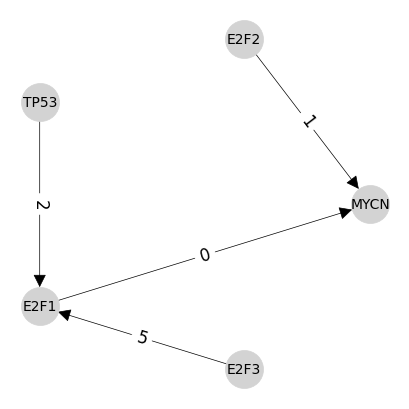

Frequency= 0.03612903225806452


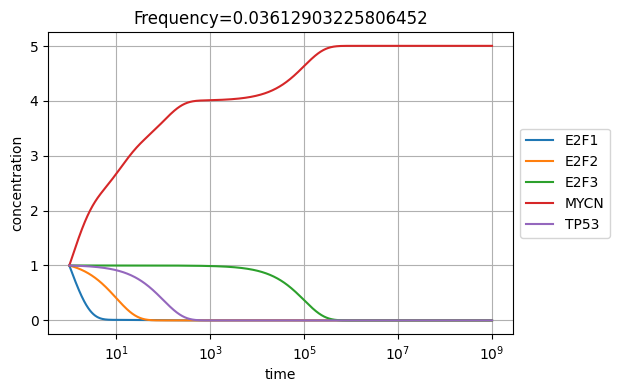

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

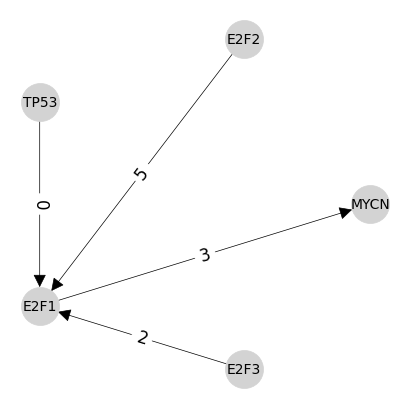

Frequency= 0.03602150537634408


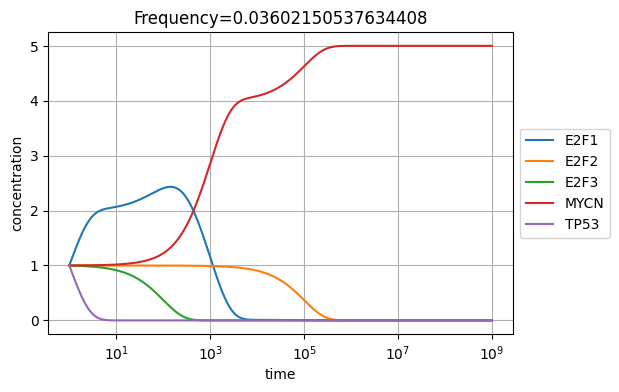

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

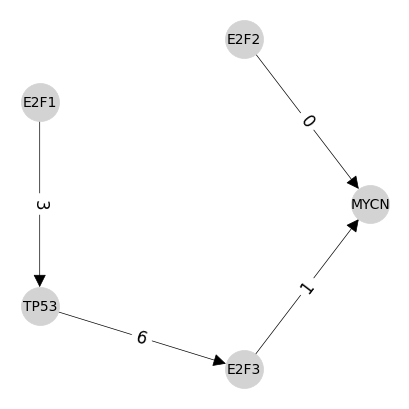

Frequency= 0.035698924731182795


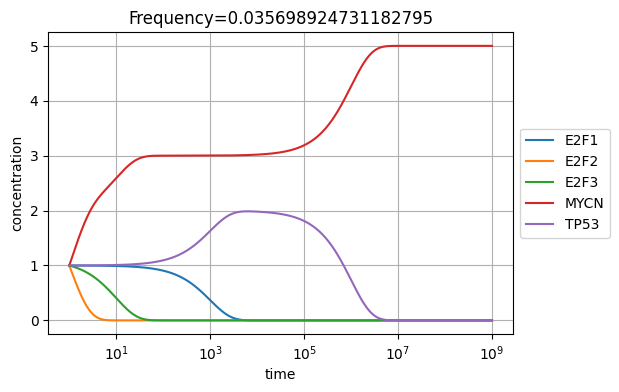

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

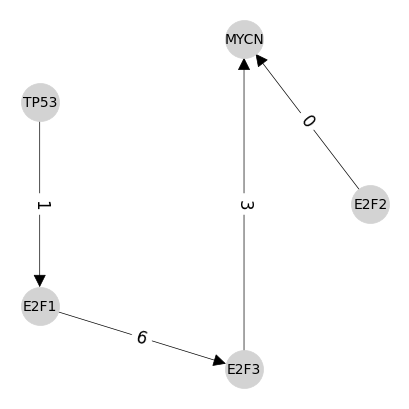

Frequency= 0.03462365591397849


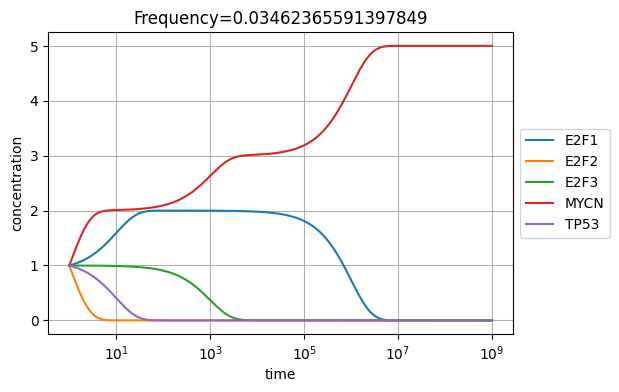

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

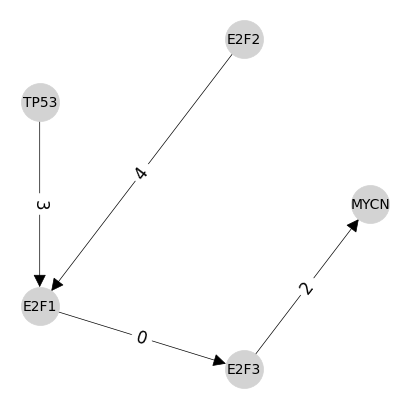

Frequency= 0.034086021505376346


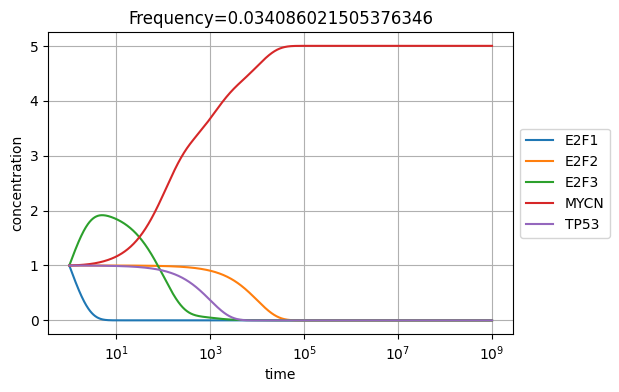

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

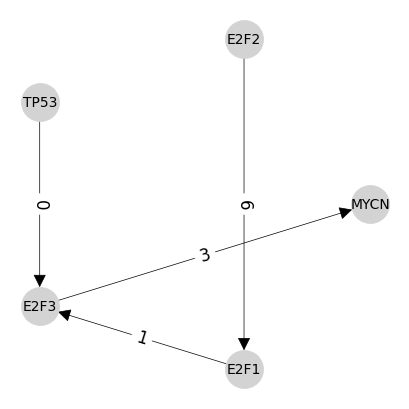

Frequency= 0.03150537634408602


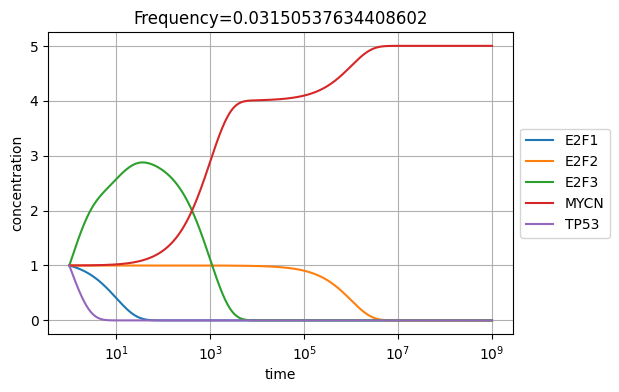

Number of unique graphs =  50


/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

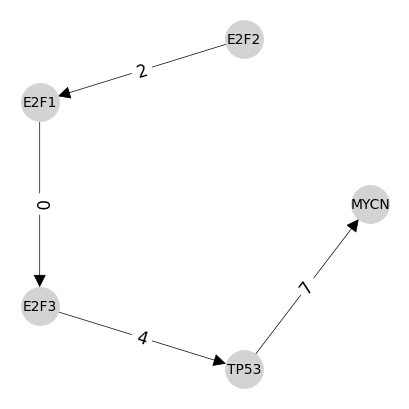

Frequency= 0.00021505376344086021


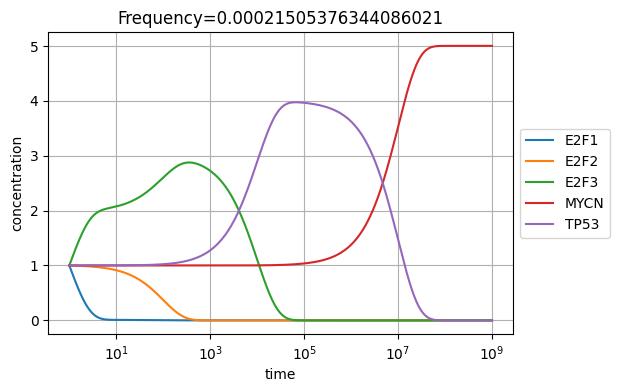

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

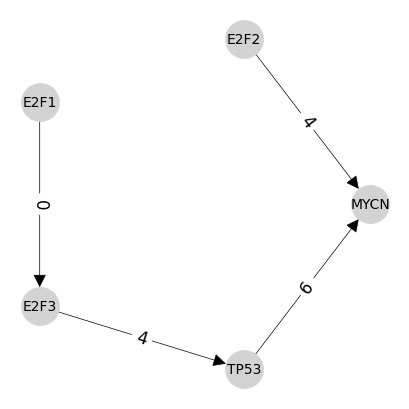

Frequency= 0.00021505376344086021


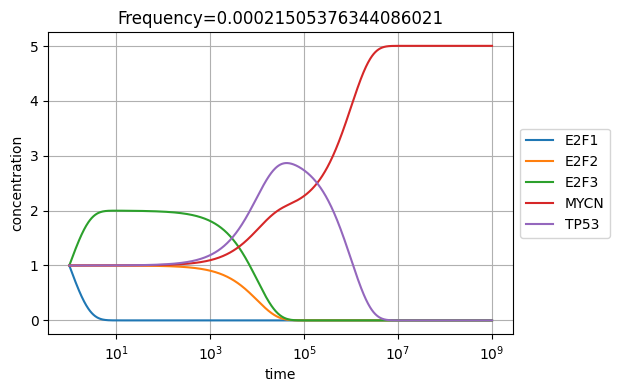

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

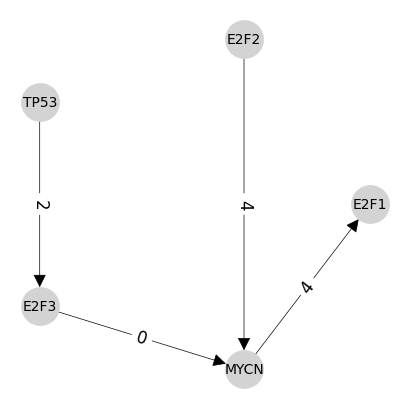

Frequency= 0.00043010752688172043


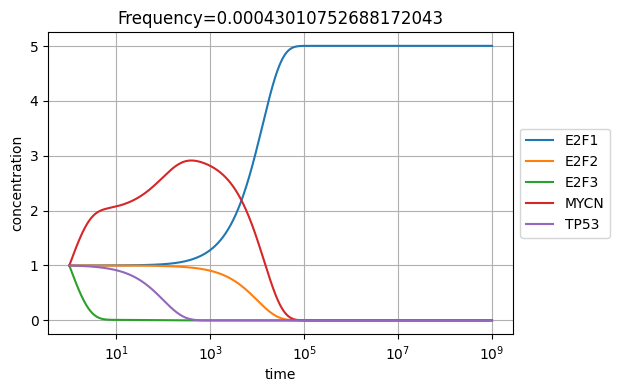

/home/zinovyev/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


<Figure size 350x350 with 0 Axes>

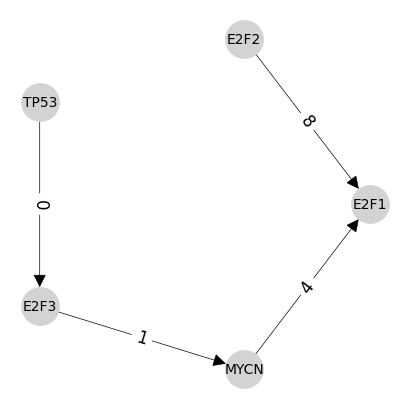

Frequency= 0.0011827956989247312


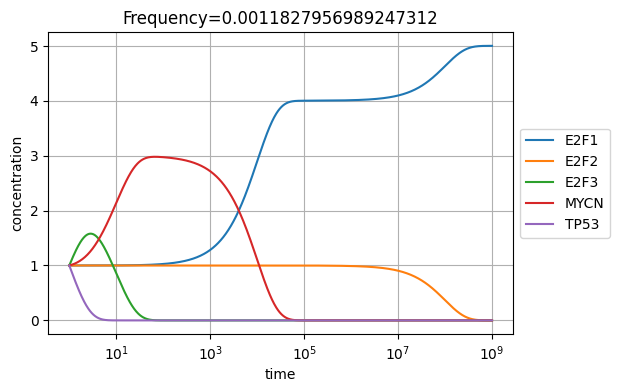

In [74]:
# draw unique graphs
def draw_unique_graphs(max_number_of_graphs=5,most_frequent=True,do_plot_dynamics = True,timescale=9):
    print('Number of unique graphs = ',len(unique_reduced))

    if most_frequent:
        irx = np.argsort(-np.array(counts))
    else:
        irx = np.argsort(np.array(counts))
    k = 0
    for i in irx:
        ugr = unique_reduced[i]
        plt.figure(figsize=(3.5,3.5))
        plt.rcParams['figure.dpi']= 50
        plot_graph(ugr,curved_edges=False,show_edge_labels=True)
        print('Frequency=',counts[i]/total_counts)
        if do_plot_dynamics:
            plt.rcParams['figure.dpi']= 100
            lnetreduce.simulate_and_plot(ugr,timescale,title='Frequency='+str(counts[i]/total_counts),method=method)
            plt.show()
        k+=1
        if k>max_number_of_graphs:
            break
            
draw_unique_graphs()
draw_unique_graphs(max_number_of_graphs=3,most_frequent=False)